<!--Información del curso-->
<img align="left" style="padding-right:10px;" src="figuras/logo_ciencia_datos.png">

<center><h1 style="font-size:2em;color:RED">Enfermedades del corazón </h1></center>

# Proyecto de Machine Learning

	
En la siguiente lección se realizará un proyecto de ejemplo de principio a fin. Estos son los pasos principales que deberá seguir:

1. Mira el panorama general y entienda el problema.
* Obtenga los datos.
* Descubra y visualice los datos para obtener información.
* Prepare los datos para los algoritmos de Machine Learning.
* Seleccione un modelo y realice el entrenamiento (train).
* Afina(fine tune) el modelo.
* Presente su solución.
* Inicie (Launch), monitoree y mantenga su sistema

[Documento extendido](https://bit.ly/2Sqtfhl)


## 1. Mira el panorama general y entienda el problema.

<center><h1 style="font-size:2em;color:#2467C0">Caso de estudio: Enfermedades del corazón </h1></center>
<br>
<table>
<col width="550">
<col width="450">
<tr>
    
    
<td><img src="figuras/corazon.jpg" align="middle" style="width:550px;"/></td>
<td>
    
Las enfermedades cardiovasculares representan una amenaza real para los sistemas de salud de muchos países, debido a que se han convertido en uno de los diagnósticos que cobra un número significativo de vidas en el mundo entero. De acuerdo a los datos emitidos por la Organización Mundial de la Salud (OMS) las enfermedades cardiovasculares son una causa importante de muertes, se estima que 9.4 millones y medio de muertes, es decir, el 16,5% de las muertes anuales, son atribuibles a la hipertensión únicamente. Esto incluye el 51% de las muertes por accidentes cardiovasculares cerebrales (AVC) y el 45% de las muertes por cardiopatía coronaria. De acuerdo a lo anteriormente mencionado, el análisis de este tipo de enfermedades se ha convertido en un factor común de investigación, la aplicación de sistemas informáticos inteligentes brinda la posibilidad de identificar de forma anticipada los pacientes que puedan padecer dicha enfermedad.

    
<br>
</td>
</tr>
</table>

**Problema**

A través del análisis de los datos se identificarán factores de riesgos que están asociados con enfermedades cardiovasculares como la edad, la presión arterial, el hábito de fumar, altos niveles de colesterol, diabetes, entre otras variables con la finalidad de ayudar al profesional de la salud a identificar si en un paciente existe riesgo de enfermedad cardiovascular.



## 2.  Obtenga los datos

Se utilizará un conjunto de datos provenientes de 4 diferentes hospitales que hacen referencia a enfermedades cardiovasculares a través del repositorio de Machine Learning UCI. El conjunto de datos cuenta con 14 atributos y 303
registros así:
1. Edad: en años
2. Sexo: masculino y femenino (tomando como valor numérico el 1 y 0 respectivamente).
3. Tipo dolor de pecho:
    * Valor1: Angina típica
    * Valor2: Angina atípica
    * Valor3: Otro dolor
    * Valor4: Asintomático
4. Presión arterial en reposo: En mmHgen la admisión al hospital.
5. Colesterol: mg/dl
6. Nivel de azúcar>120mg/dl: verdadero o falso (tomando como valor numérico el 1 y 0 respectivamente).
7. Resultado electrocardiograma:
    * Valor0: Normal
    * Valor1: Anomalías
    * Valor2: Hipertrofia ventricular
8. Frecuencia cardiaca máxima alcanzada.
9. Ejercicio de inducción de angina: sí o no (tomando como valor numérico el 1 y 0 respectivamente)
10. Depresión inducida.
11. Pendiente curva máxima del ejercicio.
12. Número de vasos mayores (0-3).
13. Thal (Trastorno sanguíneo llamado talasemia):
    * 3: Normal
    * 6: Defecto fijo
    * 7: Defecto reversible
14. Diagnóstico de enfermedad cardiaca (estado de enfermedad hagiográfica): menor 50% o mayor 50% (tomando como valor numérico el 0 y 1 respectivamente).

https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Datos: **datos/heart_disease.csv**

In [1]:
# Módulos importantes
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# Cargamos el archivo 'datos/heart_disease.csv' en un dataframe
df = pd.read_csv('datos/heart_disease.csv')
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


## 3. Descubra y visualice los datos para obtener información.

In [3]:
# Mostrar los primeras filas
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# Mostrar las columnas
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
# Mostrar el número de filas y columnas
df.shape

(303, 14)

In [6]:
# Mostrar el tipo de variables
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

<Axes: >

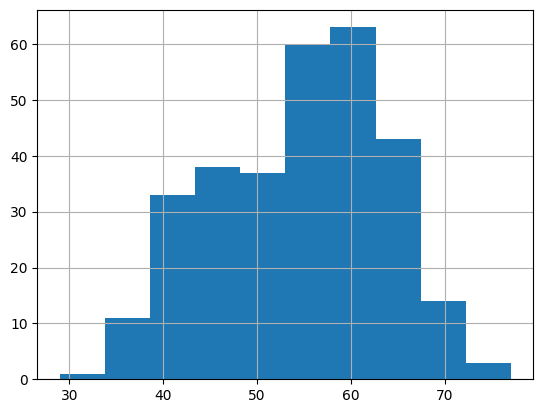

In [7]:
# Hacer un histograma de la edad
df['age'].hist()

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

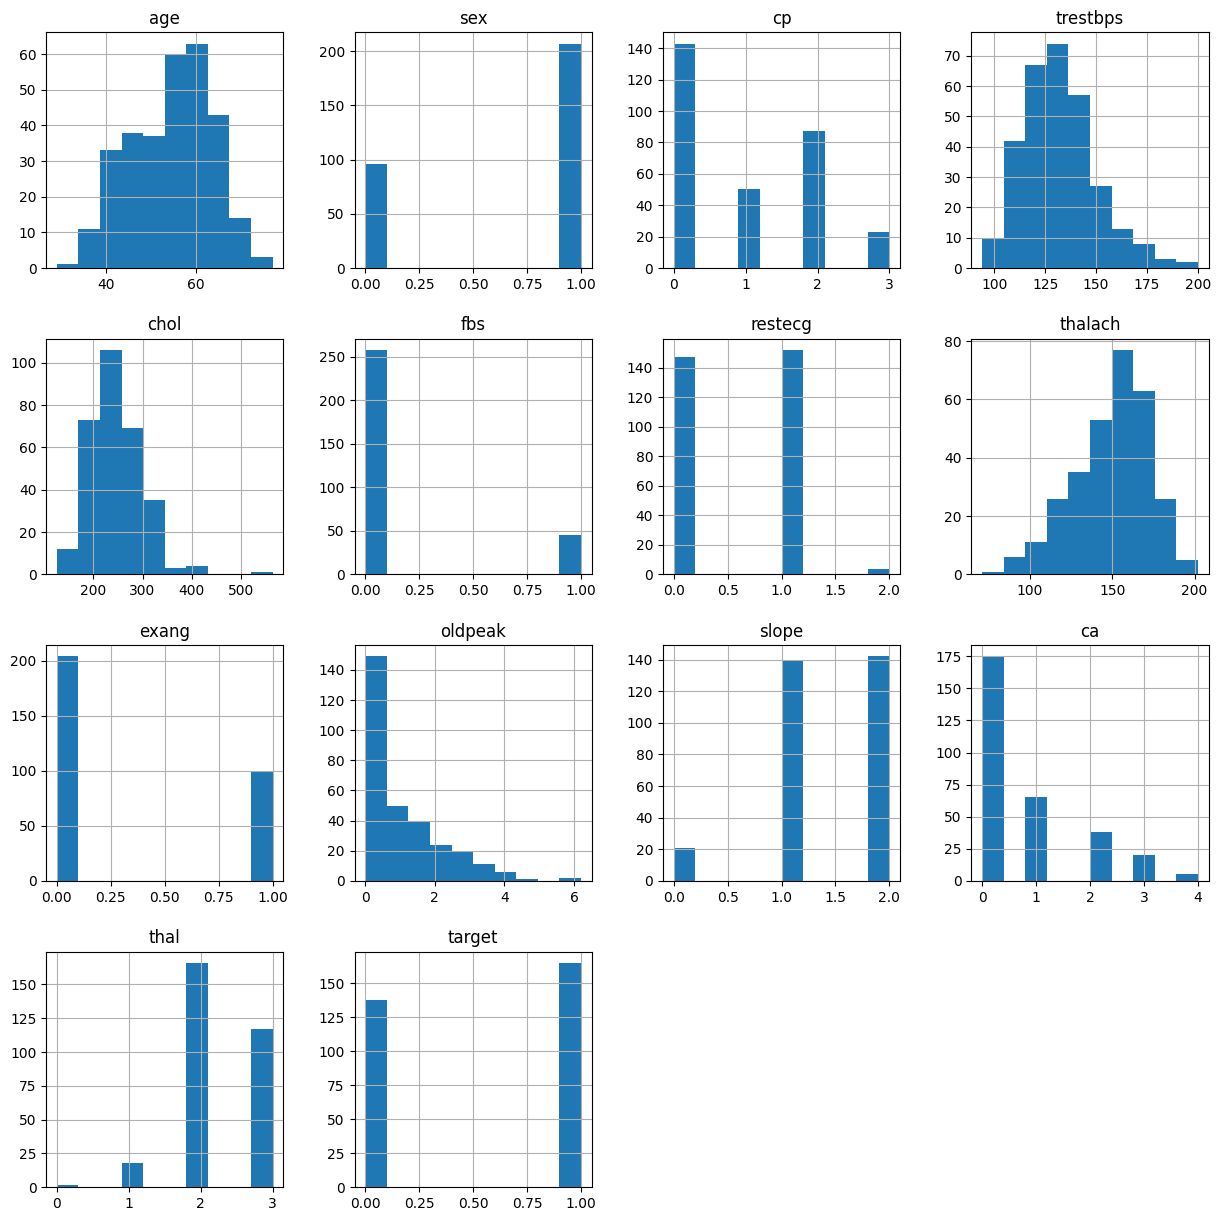

In [8]:
# Hacer un histograma de todas las variables numericas
df.hist(figsize=(15,15))

array([[<Axes: xlabel='age', ylabel='age'>,
        <Axes: xlabel='chol', ylabel='age'>,
        <Axes: xlabel='thalach', ylabel='age'>,
        <Axes: xlabel='trestbps', ylabel='age'>],
       [<Axes: xlabel='age', ylabel='chol'>,
        <Axes: xlabel='chol', ylabel='chol'>,
        <Axes: xlabel='thalach', ylabel='chol'>,
        <Axes: xlabel='trestbps', ylabel='chol'>],
       [<Axes: xlabel='age', ylabel='thalach'>,
        <Axes: xlabel='chol', ylabel='thalach'>,
        <Axes: xlabel='thalach', ylabel='thalach'>,
        <Axes: xlabel='trestbps', ylabel='thalach'>],
       [<Axes: xlabel='age', ylabel='trestbps'>,
        <Axes: xlabel='chol', ylabel='trestbps'>,
        <Axes: xlabel='thalach', ylabel='trestbps'>,
        <Axes: xlabel='trestbps', ylabel='trestbps'>]], dtype=object)

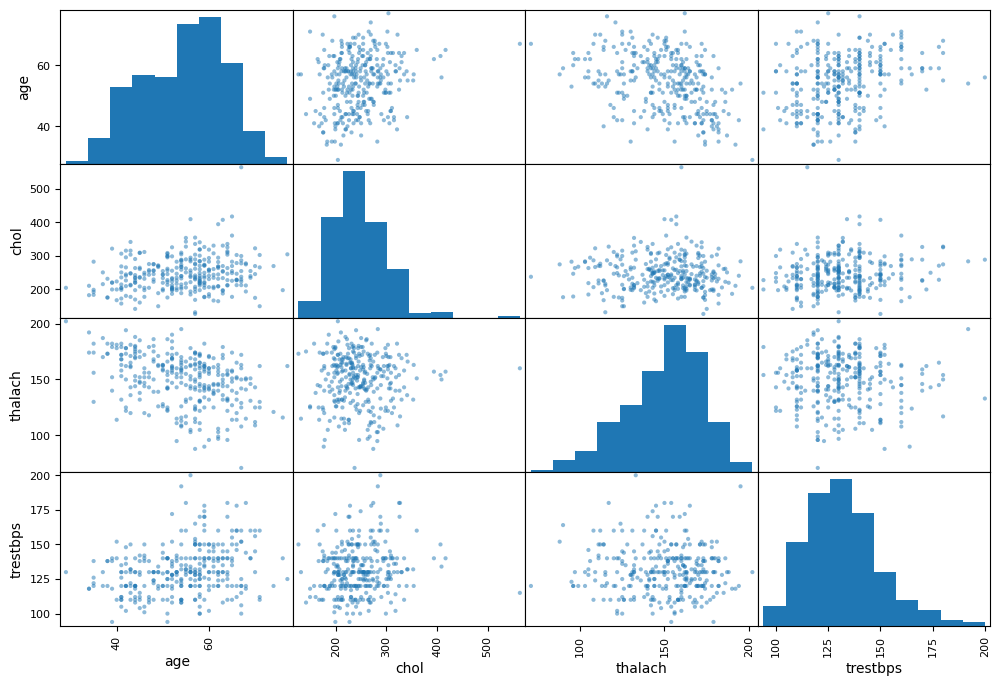

In [9]:
#Hacer diagramas de correlación
from pandas.plotting import scatter_matrix
# 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
#       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
atributos = [  'age' , 'chol' , 'thalach' , 'trestbps' ]
scatter_matrix( df[ atributos] , figsize=(12,8) )


###  Coeficiente de correlación de Pearson

<img  align="middle" style="width:850px;" src="figuras/pearson.png">

In [10]:
# Matriz correlación númerica
df[atributos].corr(method='pearson').round(2)

,age,chol,thalach,trestbps
age,1.00,0.21,-0.40,0.28
chol,0.21,1.00,-0.01,0.12
thalach,-0.40,-0.01,1.00,-0.05
trestbps,0.28,0.12,-0.05,1.00


In [11]:
# Matriz correlación visual


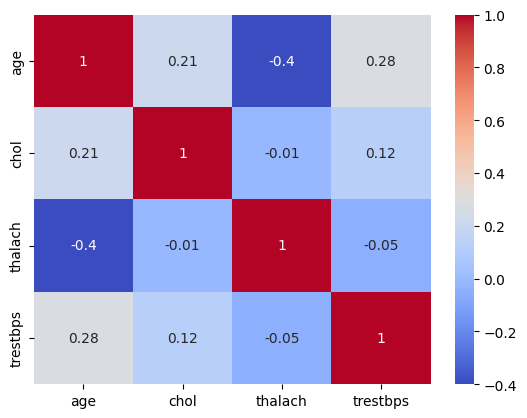

In [12]:
#Instalación de seaborn
#pip install seaborn
#https://matplotlib.org/tutorials/colors/colormaps.html
import seaborn as sn
corrMatrix=df[atributos].corr().round(2)
sn.heatmap(  corrMatrix  , annot=True , cmap='coolwarm'   )
plt.show()

## 4. Prepare los datos para los algoritmos de Machine Learning.

<img  align="middle" style="width:550px;" src="figuras/ml_diagrama3.jpg">

División general de los datos
* **X**: Datos sin el diagnostico es decir sin la columna "target"
* **y**: Datos con el diagnostico es decir con la columna "target"

Muestras de entrenamiento y prueba
* **X_train**: este será el grupo de entrenamiento
* **X_test**: este será el  grupo de prueba
* **y_train**: este será el target para el grupo de entrenamiento
* **y_test**: este será el target para el grupo de prueba


In [13]:
df.shape

(303, 14)

In [14]:
# Crear X (Quitar la columna o campo de "target")
X=df.drop('target',axis=1)
X.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2


In [15]:
# Crear y (Valor de de la columna "target")
y = df['target']
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [18]:
print(df.shape)
303*0.8

(303, 14)


242.4

In [19]:
# Dividir los datos para entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

In [20]:
# Revise  el tamaño de cada muestra
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

#### Pipeline

La función pipeline permite juntar varios trasformaciones secuenciales que se requieren ejecutar a un conjunto de datos.

**Pipeline(steps=[('titulo trasnformación1', trasnformación1), ('titulo trasnformación2', trasnformación2),...])**




In [21]:
#Modulos importantes
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
#mostrar las columnas
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [23]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [24]:
# Crear la lista de  viriables numericas  numeric_list 
numeric_list = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [25]:
# Crear el pipeline de preprocesamiento para datos numéricos  
numeric_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [26]:
# Definir los transformadores
transformer = ColumnTransformer([('num', numeric_transformer, numeric_list)])

## 5A .  Seleccione un modelo y realice el entrenamiento (train).


<img  align="middle" style="width:750px;" src="figuras/imagesTree.jpg">



###  Árbol de decisión

In [27]:
## Módulos del Modelo: Arboles de decision 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [32]:
# modelo DecisionTreeClassifier llamado DT_Classifier
DT_Classifier = DecisionTreeClassifier()
DT_Classifier.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [33]:
#Definir el modelo_DT con su pipeline
modelo_DT = Pipeline([
    ('transformer', transformer),
    ('DT_Classifier', DT_Classifier)
])

In [34]:
# Ajuste del modelo
modelo_DT.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal'])])),
                ('DT_Classifier', DecisionTreeClassifier())])

In [39]:
# Predicción
y_predict = modelo_DT.predict(X_test)

In [40]:
# Prueba en y_test
y_test = y_test.to_numpy()

In [41]:
# Comparación
y_predict == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,  True, False,  True, False,  True, False,  True,
        True,  True,  True,  True, False, False, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True, False, False,  True, False,  True])

In [45]:
(y_predict == y_test).sum() / len(y_test)

0.7377049180327869

In [48]:
np.equal(y_predict, y_test).sum()

45

In [46]:
# Score
modelo_DT.score(X_test, y_test)

0.7377049180327869

## Cross validation


In [54]:
# Definir los parametros con el diccionario params utilizando:
max_depth=[2,4,6,8,10]
min_samples_leaf=[2,4,6,8,10,12,14,15,16,17,18,20,30]
params = {
    'DT_Classifier__max_depth': max_depth,
    'DT_Classifier__min_samples_leaf': min_samples_leaf,
}

## 6A .  Afina(fine tune) el modelo.

In [55]:
# Ajuste de los parametros max_depth y min_samples_leaf con  GridSearchCV
# Utilizamos la función GridSearchCV para encontrar los valores optimos
from sklearn.model_selection import GridSearchCV
grid_DT = GridSearchCV(modelo_DT, param_grid = params,
                      cv = 5,
                      scoring = 'neg_mean_squared_error',
                      n_jobs = -1,
                      verbose = 1)

In [56]:
# Ajuste del modelo usando todas las posibles combinaciones de parametros 
grid_DT.fit(X, y)

Fitting 5 folds for each of 65 candidates, totalling 325 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'sex',
                                                                          'cp',
                                                                          'trestbps',
                                                                          'chol',
                                                                          'fbs',
                                                                          'restecg',
                                                                          'thalach',
                                                                          'exang',
                                                                          'oldpeak',
                                                                          'slope',
                                                                          'ca',
                                                                          'thal'])])),
                                       ('DT_Classifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'DT_Classifier__max_depth': [2, 4, 6, 8, 10],
                         'DT_Classifier__min_samples_leaf': [2, 4, 6, 8, 10, 12,
                                                             14, 15, 16, 17, 18,
                                                             20, 30]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
#Encontrar los mejores parametros con best_params_
grid_DT.best_params_

{'DT_Classifier__max_depth': 4, 'DT_Classifier__min_samples_leaf': 16}

In [59]:
#1 Ajustar el modelo con los nuevos parametros nombrandolo como  DT_Classifier_tunned
DT_Clssifier = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 16)

In [61]:
#2. Definir el Pipeline : Transformación  + modelo
modelo_DT = Pipeline([
    ('transformer', transformer),
    ('DT_Classifier', DT_Classifier)
])

In [62]:
#3. Ajustar el modelo
modelo_DT.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'sex', 'cp',
                                                   'trestbps', 'chol', 'fbs',
                                                   'restecg', 'thalach',
                                                   'exang', 'oldpeak', 'slope',
                                                   'ca', 'thal'])])),
                ('DT_Classifier', DecisionTreeClassifier())])

In [63]:
#4 Score
modelo_DT.score(X_test, y_test)

0.7704918032786885

In [66]:
#Evaluacion
# Calcular el score con la validación cruzada CV=5
from sklearn.model_selection import cross_val_score

modelo_DT_scores = cross_val_score(modelo_DT, X, y, scoring = 'neg_mean_squared_error', cv = 5)

In [67]:
def display_scores( scores) :
    print('Scores:', scores)
    print('Mean:', scores.mean())
    print('Standard Deviation:', scores.std())

In [70]:
# 5. Realizar el cambio de signo y sacar la raiz
scores = np.sqrt(-modelo_DT_scores)

In [71]:
# 6. Mostrar el resultado usando la funcion display_scores
display_scores(scores)

Scores: [0.51214752 0.42465029 0.54321448 0.51639778 0.54772256]
Mean: 0.5088265246102768
Standard Deviation: 0.04438338419857229


## 7. Presente su solución

| Modelo o clasificador | Mean | SD | Parametros de ajuste |
|---|---|---|---|
| Decision Tree Classifier | 0.5088 | 0.0444 | max_depth = 4, min_samples_leaf = 16 |  
